In [1]:
!pip install pandas
!pip install numpy
!pip install datasets
!pip install torch
!pip install torch
!pip install germansentiment
!pip install evaluate
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
import datasets
import torch
import os
from datasets import load_dataset, load_from_disk, concatenate_datasets
from germansentiment import SentimentModel
from sklearn.model_selection import train_test_split
import evaluate

In [3]:
model = SentimentModel()

In [4]:
dataset = pd.read_csv('/content/for sentiment analysis.csv')

In [6]:
dataset.head()

,review,score,upvotes,downvotes,date
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,1562135719091
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,1538035078776
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,1642090754318
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,1515945190594
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,1655832259676


In [24]:
model.predict_sentiment(dataset['review'].tolist()[:5])

['neutral', 'positive', 'negative', 'negative', 'positive']

In [28]:
for i in range(0, 100, 32):
  print(i)

0
32
64
96


In [33]:
def batch_predict_sentiment(texts, batch_size=128):
    sentiments = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_sentiments = model.predict_sentiment(batch_texts)
        sentiments.extend(batch_sentiments)
        print(i)

    return sentiments

a = batch_predict_sentiment(dataset['review'].tolist())
#dataset['sentiment'] =

#dataset['sentiment'] = model.predict_sentiment(dataset['review'])

0
128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4992
5120
5248
5376
5504
5632
5760
5888
6016
6144
6272
6400
6528
6656
6784
6912
7040
7168
7296
7424
7552
7680
7808
7936
8064
8192
8320
8448
8576
8704
8832
8960
9088
9216
9344
9472


In [34]:
len(a)

9482

In [44]:
dataset['sentiment'] = a

In [45]:
dataset

,review,score,upvotes,downvotes,sentiment,sentiment_numeric
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,neutral,0
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,positive,1
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,negative,-1
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,negative,-1
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,positive,1
...,...,...,...,...,...,...
9477,"Sehr schwierig, wenn Sie nichts über Fotografi...",2,0.0,0.0,negative,-1
9478,"Sehr interessanter Kurs, der einige sehr wicht...",5,0.0,0.0,positive,1
9479,"Wirklich, verdammt langweilig...",2,0.0,0.0,negative,-1
9480,Gute Einführung in die Programmierung in Pytho...,3,0.0,0.0,neutral,0


In [46]:
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}

dataset['sentiment_numeric'] = dataset['sentiment'].map(sentiment_mapping)

In [47]:
dataset

,review,score,upvotes,downvotes,sentiment,sentiment_numeric
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,neutral,0
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,positive,1
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,negative,-1
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,negative,-1
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,positive,1
...,...,...,...,...,...,...
9477,"Sehr schwierig, wenn Sie nichts über Fotografi...",2,0.0,0.0,negative,-1
9478,"Sehr interessanter Kurs, der einige sehr wicht...",5,0.0,0.0,positive,1
9479,"Wirklich, verdammt langweilig...",2,0.0,0.0,negative,-1
9480,Gute Einführung in die Programmierung in Pytho...,3,0.0,0.0,neutral,0


In [51]:
dataset.to_csv('numeric sentiment wo date.csv',index = False)

In [52]:
dataset2 = pd.read_csv('/content/for sentiment analysis.csv')

In [53]:
import datetime

def convert_timestamp(timestamp_milliseconds):
    timestamp_seconds = timestamp_milliseconds / 1000
    date_object = datetime.datetime.fromtimestamp(timestamp_seconds)
    return date_object.strftime('%d.%m.%Y')

# Apply the function to the 'date' column
dataset['date'] = dataset2['date'].apply(convert_timestamp)
dataset


,review,score,upvotes,downvotes,sentiment,sentiment_numeric,date
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,neutral,0,03.07.2019
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,positive,1,27.09.2018
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,negative,-1,13.01.2022
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,negative,-1,14.01.2018
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,positive,1,21.06.2022
...,...,...,...,...,...,...,...
9477,"Sehr schwierig, wenn Sie nichts über Fotografi...",2,0.0,0.0,negative,-1,07.09.2022
9478,"Sehr interessanter Kurs, der einige sehr wicht...",5,0.0,0.0,positive,1,16.09.2022
9479,"Wirklich, verdammt langweilig...",2,0.0,0.0,negative,-1,05.10.2022
9480,Gute Einführung in die Programmierung in Pytho...,3,0.0,0.0,neutral,0,24.10.2022


In [57]:
dataset['recency'] = (pd.Timestamp(datetime.date.today()) - pd.to_datetime(dataset['date'], dayfirst=True)).dt.days

In [58]:
dataset

,review,score,upvotes,downvotes,sentiment,sentiment_numeric,date,recency
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,neutral,0,03.07.2019,1573
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,positive,1,27.09.2018,1852
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,negative,-1,13.01.2022,648
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,negative,-1,14.01.2018,2108
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,positive,1,21.06.2022,489
...,...,...,...,...,...,...,...,...
9477,"Sehr schwierig, wenn Sie nichts über Fotografi...",2,0.0,0.0,negative,-1,07.09.2022,411
9478,"Sehr interessanter Kurs, der einige sehr wicht...",5,0.0,0.0,positive,1,16.09.2022,402
9479,"Wirklich, verdammt langweilig...",2,0.0,0.0,negative,-1,05.10.2022,383
9480,Gute Einführung in die Programmierung in Pytho...,3,0.0,0.0,neutral,0,24.10.2022,364


In [60]:
dataset['review length'] = dataset['review'].str.len()

In [61]:
dataset

,review,score,upvotes,downvotes,sentiment,sentiment_numeric,date,recency,review length
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,neutral,0,03.07.2019,1573,86
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,positive,1,27.09.2018,1852,91
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,negative,-1,13.01.2022,648,85
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,negative,-1,14.01.2018,2108,312
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,positive,1,21.06.2022,489,248
...,...,...,...,...,...,...,...,...,...
9477,"Sehr schwierig, wenn Sie nichts über Fotografi...",2,0.0,0.0,negative,-1,07.09.2022,411,318
9478,"Sehr interessanter Kurs, der einige sehr wicht...",5,0.0,0.0,positive,1,16.09.2022,402,263
9479,"Wirklich, verdammt langweilig...",2,0.0,0.0,negative,-1,05.10.2022,383,32
9480,Gute Einführung in die Programmierung in Pytho...,3,0.0,0.0,neutral,0,24.10.2022,364,410


In [62]:
!pip install pandas seaborn matplotlib


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Drop the 'sentiment' column
dataset = dataset.drop('sentiment', axis=1)

# Rename the 'sentiment_numeric' column to 'sentiment'
dataset = dataset.rename(columns={'sentiment_numeric': 'sentiment'})
dataset

,review,score,upvotes,downvotes,sentiment,date,recency,review length
0,interessantes aber sehr aufwändiges Fach. Die ...,3,0.0,1.0,0,03.07.2019,1573,86
1,Warum wird Moodle Verwendet & nicht OLAT? Anso...,4,4.0,8.0,1,27.09.2018,1852,91
2,"langwiilig, Management teil nutzlos, nur uswän...",2,0.0,1.0,-1,13.01.2022,648,85
3,In diesem Fach zeichnet man Flowcharts und Pro...,3,0.0,0.0,-1,14.01.2018,2108,312
4,weiss nöd warum so viel klaget. de dozent isch...,5,1.0,0.0,1,21.06.2022,489,248
...,...,...,...,...,...,...,...,...
9477,"Sehr schwierig, wenn Sie nichts über Fotografi...",2,0.0,0.0,-1,07.09.2022,411,318
9478,"Sehr interessanter Kurs, der einige sehr wicht...",5,0.0,0.0,1,16.09.2022,402,263
9479,"Wirklich, verdammt langweilig...",2,0.0,0.0,-1,05.10.2022,383,32
9480,Gute Einführung in die Programmierung in Pytho...,3,0.0,0.0,0,24.10.2022,364,410


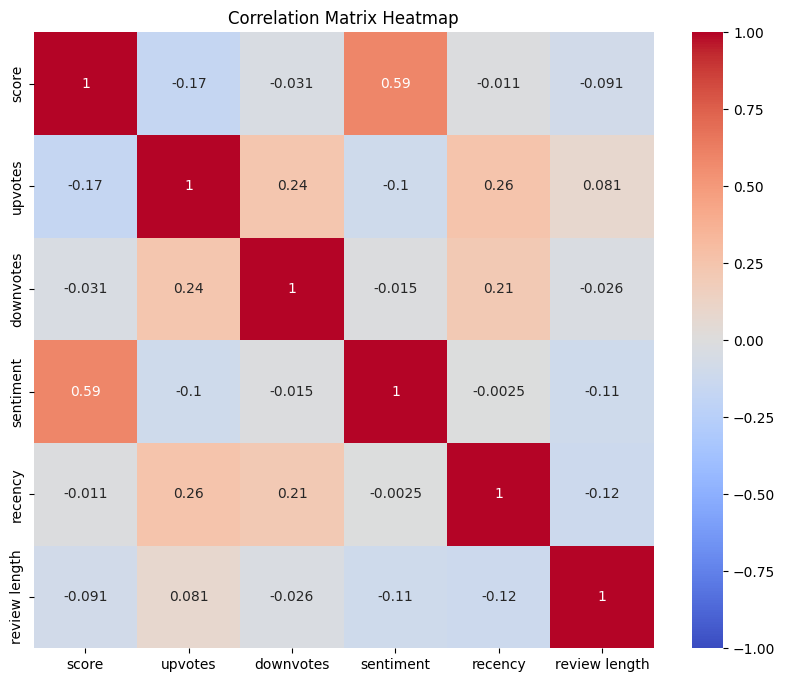

In [66]:
corr = dataset[['score','upvotes','downvotes','sentiment', 'recency', 'review length']].corr()

plt.figure(figsize=(10, 8))  # adjust the size of the figure
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [67]:
plt.savefig('heatmap.png')

<Figure size 640x480 with 0 Axes>

In [68]:
dataset.to_csv('sentiment analysis.csv',index = False)